<a href="https://colab.research.google.com/github/rrizkiramadhan08/RizkiRamadhanTask/blob/main/Week03/Classification_model_Decision_Tree_dan_K_NN_Rizki_Ramadhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import graphviz

In [ ]:
# Step 1: Load Dataset
df = pd.read_csv('/content/drive/MyDrive/DATA SET/CreditDataset.csv')

# Step 2: Preprocess the dataset (gunakan One-Hot Encoding untuk data kategorikal)
df_encoded = pd.get_dummies(df, drop_first=True)  # One-Hot Encoding untuk data kategorikal

# Memisahkan fitur (X) dan target (y)
X = df_encoded.drop('Class', axis=1).values  # Semua fitur kecuali 'Class'
y = df_encoded['Class'].values  # Kolom target 'Class'

In [ ]:
# Step 3: Split data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Decision Tree Model ###

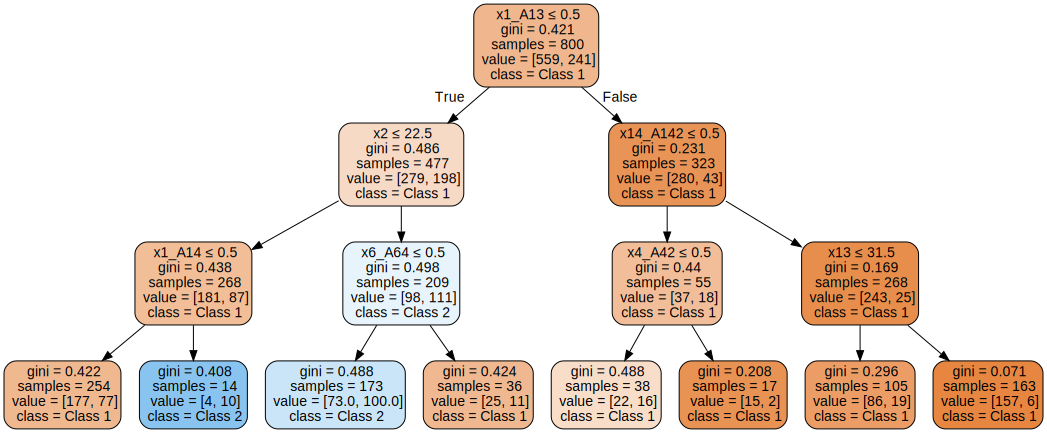

In [ ]:
# Step 4: Train Decision Tree model
max_depth_value = 3  # Anda bisa mengubah nilai ini sesuai kebutuhan
tree_model = DecisionTreeClassifier(max_depth=max_depth_value, random_state=42)
tree_model.fit(X_train, y_train)

# Step 5: Visualisasi Decision Tree menggunakan Graphviz (langsung ditampilkan)
dot_data = export_graphviz(tree_model, out_file=None,
                           feature_names=df_encoded.columns[:-1],  # Nama fitur
                           class_names=['Class 1', 'Class 2'],  # Nama kelas
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph  # Menampilkan langsung pohon keputusan

In [ ]:
# Step 6: Evaluate Decision Tree model
accuracy_tree = accuracy_score(y_test, tree_model.predict(X_test))
print(f"Decision Tree Accuracy: {accuracy_tree:.4f}")
print(f"Decision Tree Classification Report:\n {classification_report(y_test, tree_model.predict(X_test))}")

Decision Tree Accuracy: 0.7600
Decision Tree Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.87      0.84       141
           2       0.61      0.51      0.56        59

    accuracy                           0.76       200
   macro avg       0.71      0.69      0.70       200
weighted avg       0.75      0.76      0.75       200



### K-NN Model ###

In [ ]:
# Step 7: Gunakan hanya dua fitur pertama untuk melatih K-NN untuk visualisasi
# Menggunakan dua fitur pertama untuk visualisasi
X_knn = df_encoded.iloc[:, :2].values  # Pilih dua fitur untuk K-NN visualisasi
y_knn = df_encoded['Class'].values

In [ ]:
# Step 8: Split data untuk K-NN (hanya menggunakan 2 fitur)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

# Step 9: Initialize and train K-Nearest Neighbors (K-NN) model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Step 10: Membuat meshgrid untuk visualisasi
# Mendefinisikan batas minimum dan maksimum untuk setiap fitur
x_min, x_max = X_knn[:, 0].min() - 1, X_knn[:, 0].max() + 1
y_min, y_max = X_knn[:, 1].min() - 1, X_knn[:, 1].max() + 1

# Mengurangi resolusi untuk mempercepat visualisasi
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),  # Resolusi lebih rendah (0.5)
                     np.arange(y_min, y_max, 0.5))

# Menggunakan model K-NN untuk memprediksi seluruh area di meshgrid
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

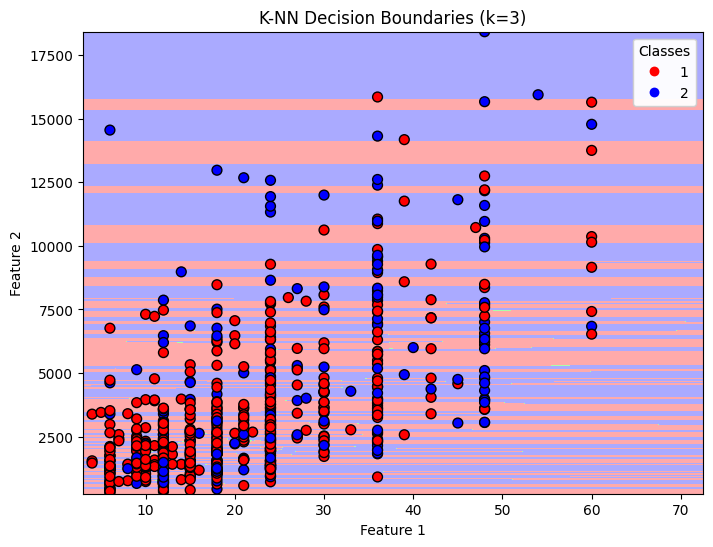

In [ ]:
# Step 11: Plot decision boundaries
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # Warna untuk decision boundaries
cmap_bold = ['#FF0000', '#00FF00', '#0000FF']  # Warna untuk data

# Plot area yang diprediksi oleh K-NN
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot titik-titik data training dengan ukuran marker yang lebih kecil
scatter = plt.scatter(X_train_knn[:, 0], X_train_knn[:, 1], c=y_train_knn,
                      cmap=ListedColormap(cmap_bold), edgecolor='k', s=50)  # Ukuran marker lebih kecil

# Tambahkan label dan judul
plt.title('K-NN Decision Boundaries (k=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Tambahkan legenda
legend1 = plt.legend(*scatter.legend_elements(), title="Classes", loc="upper right")
plt.gca().add_artist(legend1)

# Tampilkan plot
plt.show()


In [ ]:
# Step 12: Evaluate K-NN model
accuracy_knn = accuracy_score(y_test_knn, knn_model.predict(X_test_knn))
print(f"K-NN Accuracy: {accuracy_knn:.4f}")
print(f"K-NN Classification Report:\n {classification_report(y_test_knn, knn_model.predict(X_test_knn))}")

K-NN Accuracy: 0.6450
K-NN Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.85      0.77       141
           2       0.30      0.15      0.20        59

    accuracy                           0.65       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.59      0.65      0.60       200

